EXERCISE 16.1

1) MNIST: 28 Seconds
          98.9% accuracy

2)Fashion-MNIST: 23 Seconds
                 90.5% Accuracy

Overall similar run times consistently through multiple runs. Near 10% accuracy difference consistently as it seems discerning the clothing is much more difficult.

In [271]:
# from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist

In [272]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt

In [274]:
import seaborn as sns
sns.set(font_scale=2)

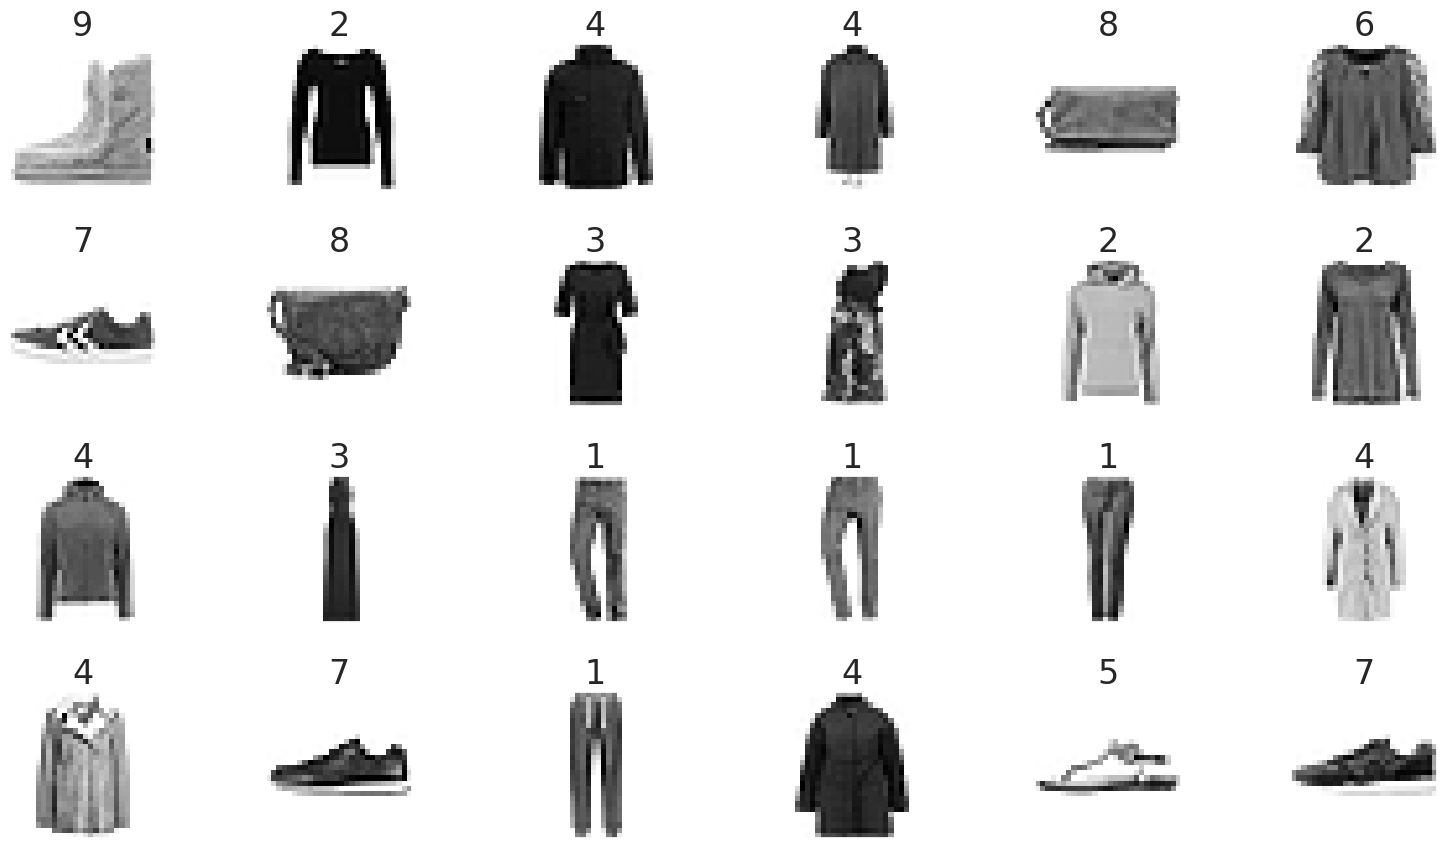

In [275]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [276]:
X_train = X_train.reshape((60000, 28, 28, 1))

X_train.shape

X_test = X_test.reshape((10000, 28, 28, 1))

X_test.shape

(10000, 28, 28, 1)

In [277]:
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [278]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_train.shape
y_train[0]

y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [279]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [280]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [281]:
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [282]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [283]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [284]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [285]:
cnn.add(Flatten())

In [286]:
cnn.add(Dense(units=128, activation='relu'))

In [287]:
cnn.add(Dense(units=10, activation='softmax'))

In [288]:
cnn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 448,330 (1.71 MB)

 Trainable params: 448,330 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

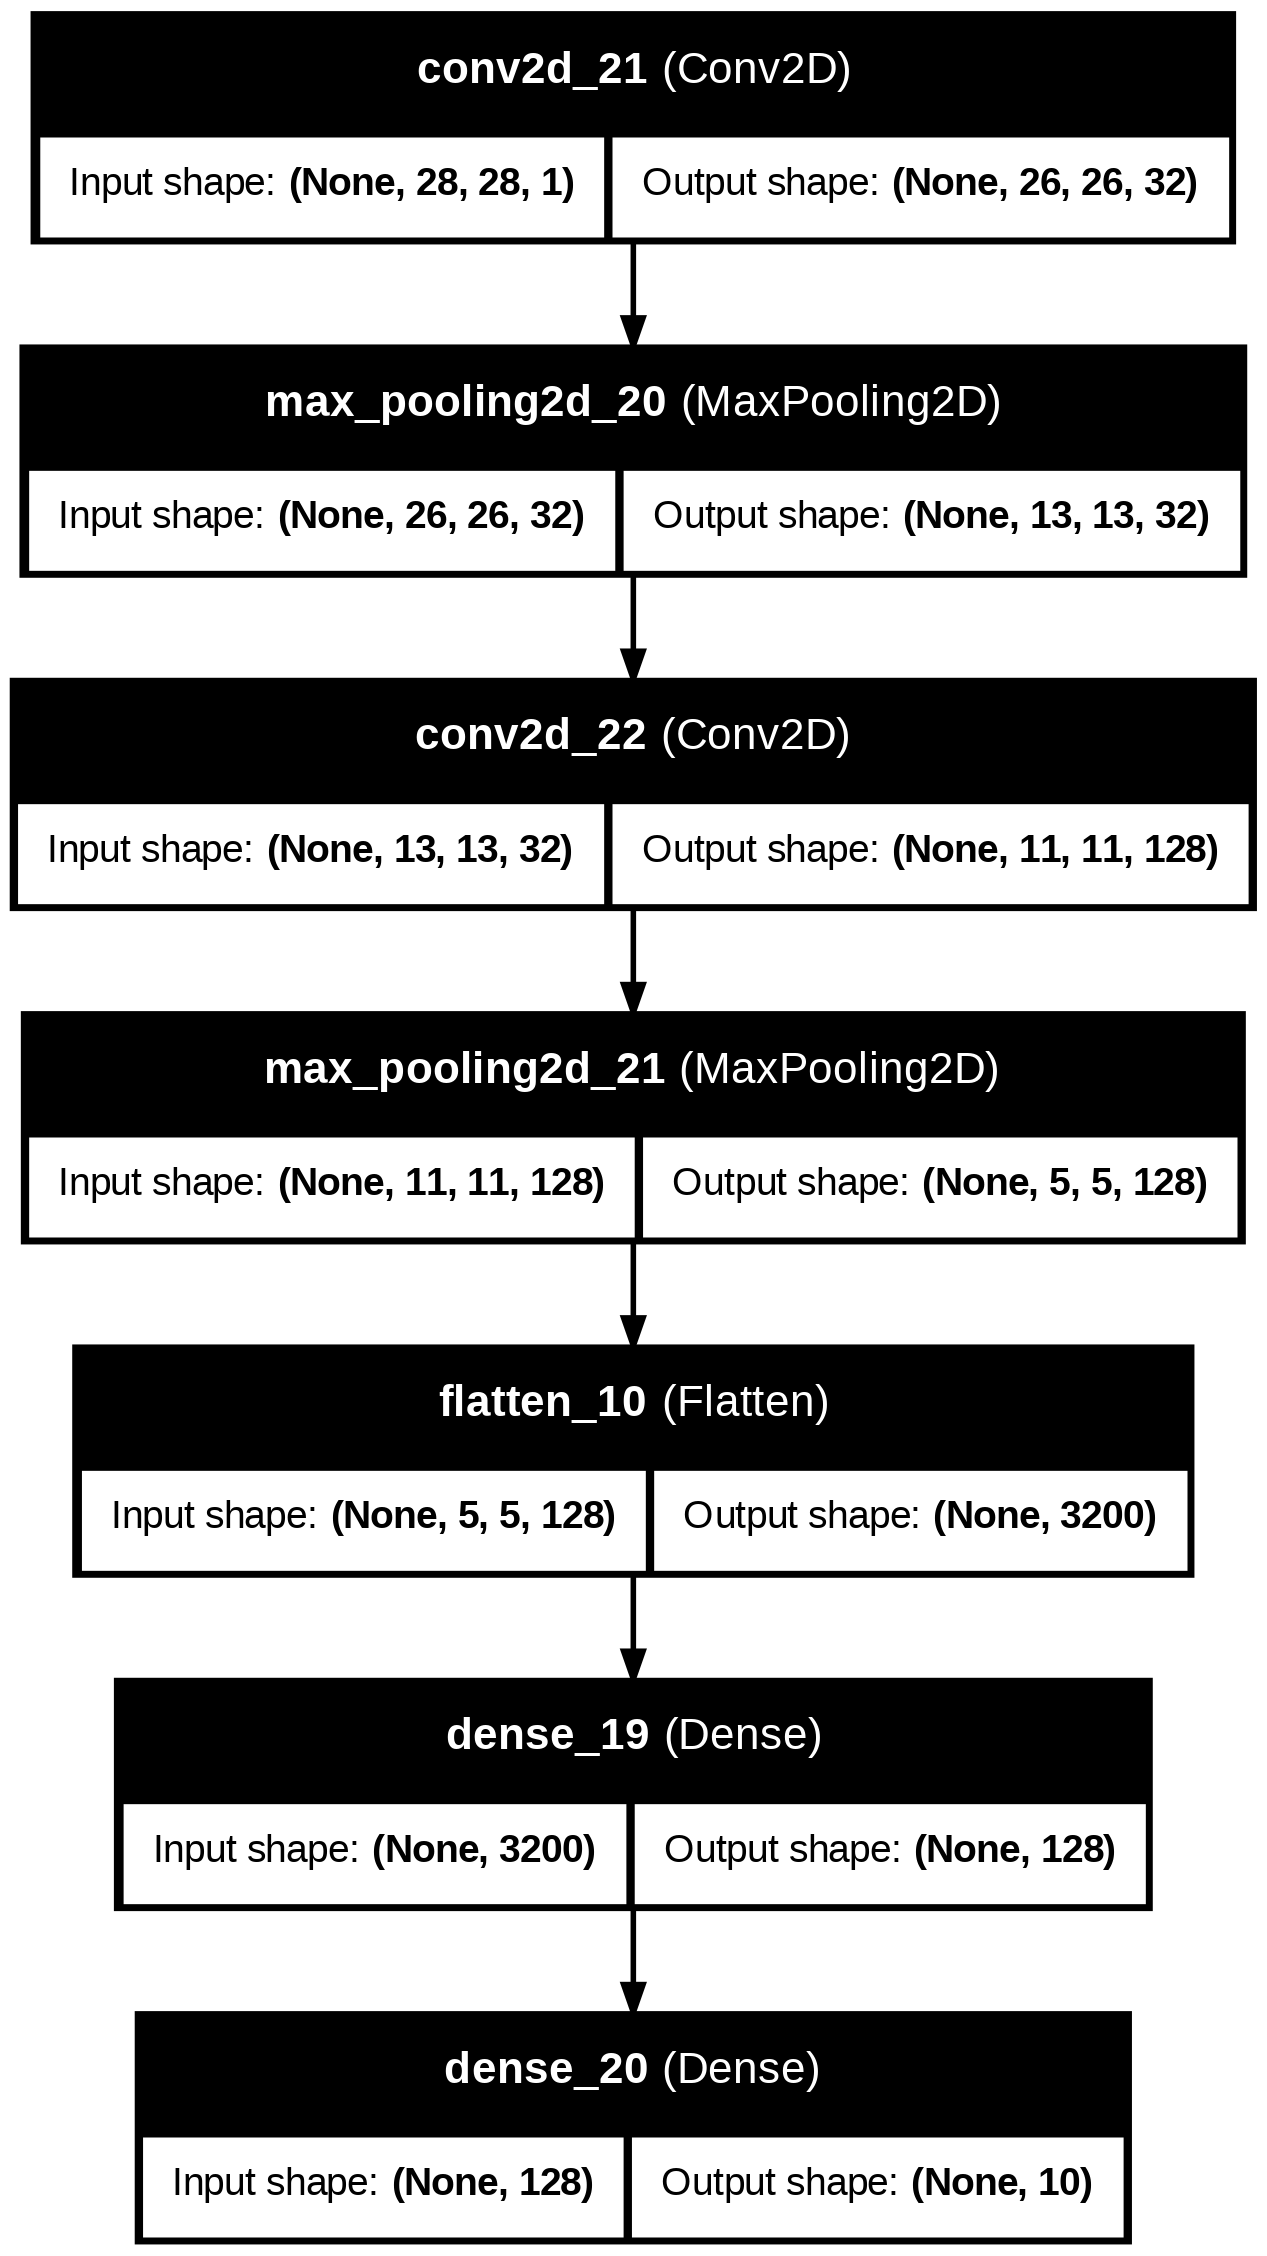

In [289]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [290]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [291]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7602 - loss: 0.6625 - val_accuracy: 0.8705 - val_loss: 0.3602
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8808 - loss: 0.3264 - val_accuracy: 0.8913 - val_loss: 0.2899
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9015 - loss: 0.2696 - val_accuracy: 0.9027 - val_loss: 0.2601
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9146 - loss: 0.2295 - val_accuracy: 0.8962 - val_loss: 0.2780
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9251 - loss: 0.2035 - val_accuracy: 0.9038 - val_loss: 0.2645


In [292]:
loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8971 - loss: 0.2849
Test loss: 0.27919310331344604
Test accuracy: 0.8960999846458435


In [293]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [294]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [295]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0001688600%
1: 0.0000322440%
2: 0.0000227997%
3: 0.0000002498%
4: 0.0000130838%
5: 0.0556819083%
6: 0.0000136922%
7: 0.0405238825%
8: 0.0002276078%
9: 99.9033153057%



------------------------------------------------------

------------------------------------------------------

EXERCISE 16.4

Dense layer original: 90.9% Accuracy

Dense layer removed: 89.99% Accuracy

Dense layer 4096 added: 91.0% Accuracy

I used fashion_mnist to show a better change in accuracy. As you can see, typically more layers/detailed layers equates to better accuracy.

In [296]:
from tensorflow.keras.datasets import fashion_mnist

In [297]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [298]:
X_train.shape

y_train.shape

X_test.shape

y_test.shape

(10000,)

In [299]:
%matplotlib inline
import matplotlib.pyplot as plt

In [300]:
import seaborn as sns
sns.set(font_scale=2)

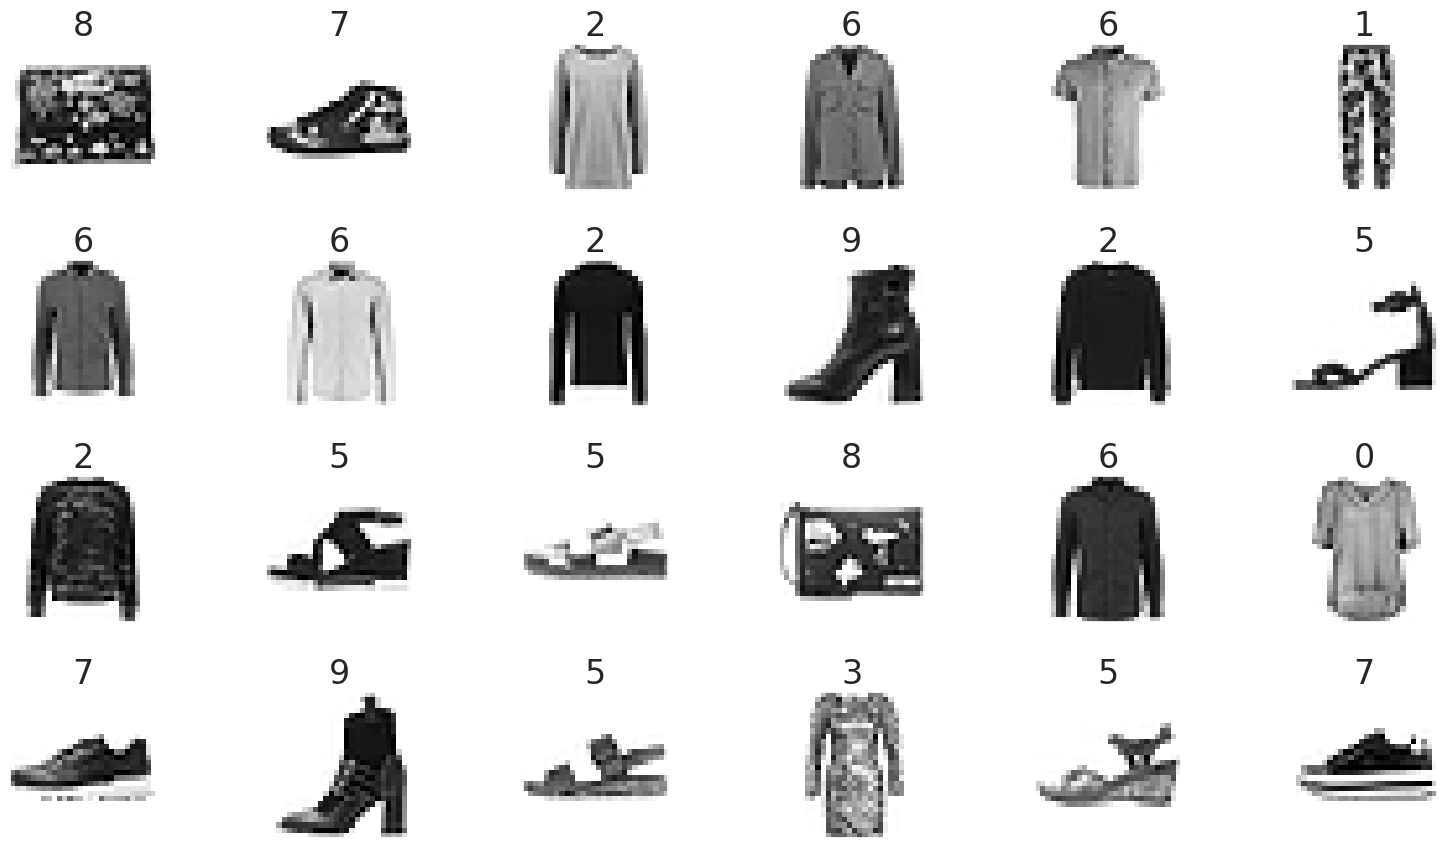

In [301]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [302]:
X_train = X_train.reshape((60000, 28, 28, 1))

X_train.shape

(60000, 28, 28, 1)

In [303]:
X_test = X_test.reshape((10000, 28, 28, 1))

X_test.shape

(10000, 28, 28, 1)

In [304]:
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [305]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_train.shape
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [306]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [307]:
from tensorflow.keras.models import Sequential

cnn = Sequential()

In [308]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [309]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [310]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [311]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [312]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [313]:
cnn.add(Flatten())

In [314]:
cnn.add(Dense(units=4096, activation='relu'))

In [315]:
cnn.add(Dense(units=128, activation='relu'))

In [316]:
cnn.add(Dense(units=10, activation='softmax'))

In [317]:
cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

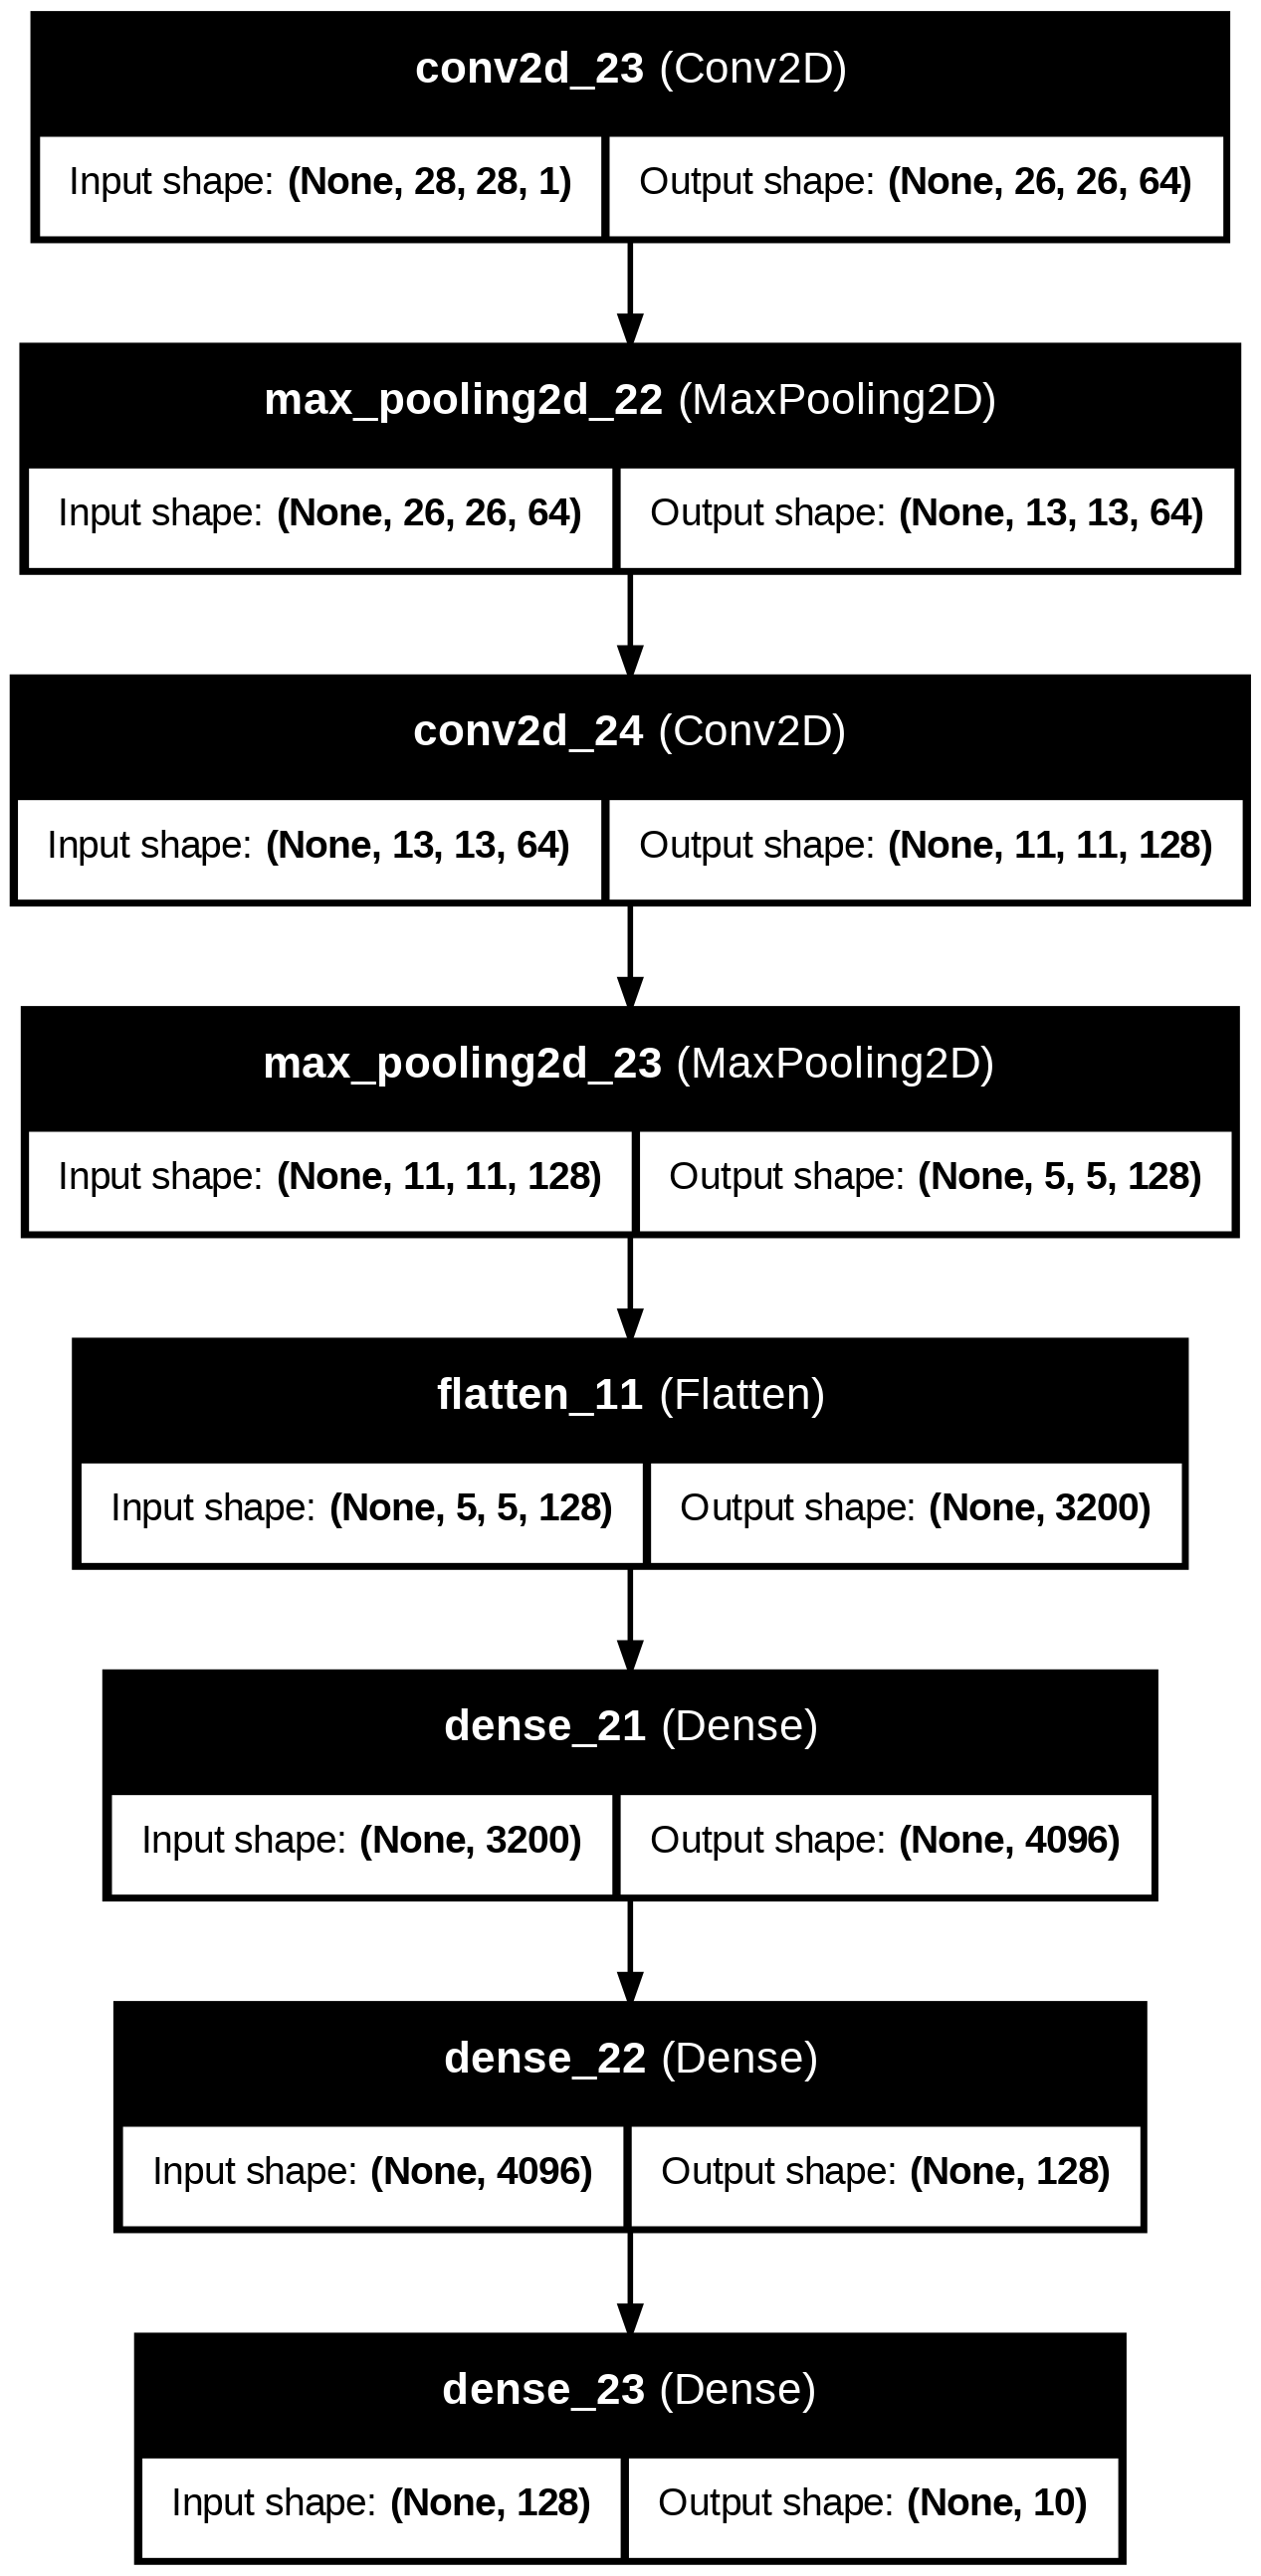

In [318]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [319]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [320]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7848 - loss: 0.5806 - val_accuracy: 0.8935 - val_loss: 0.2935
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8940 - loss: 0.2831 - val_accuracy: 0.8990 - val_loss: 0.2789
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9142 - loss: 0.2294 - val_accuracy: 0.9075 - val_loss: 0.2502
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9293 - loss: 0.1902 - val_accuracy: 0.9133 - val_loss: 0.2474
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9394 - loss: 0.1566 - val_accuracy: 0.9108 - val_loss: 0.2495


In [321]:
loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.2664
Test loss: 0.2541743516921997
Test accuracy: 0.9101999998092651


In [322]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [323]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [324]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000038%
1: 0.0000032457%
2: 0.0000000053%
3: 0.0000000008%
4: 0.0000000041%
5: 0.0000878135%
6: 0.0000000086%
7: 0.0020869884%
8: 0.0000014105%
9: 99.9978184700%
